In [26]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
import sys, os 
import warnings
warnings.filterwarnings('ignore')

In [27]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_helper import FileHelper
from clean_data import Clean_data
import visualization as vs
from scale_norm import Scaler_Normalize
from outlier import Outlier 
file_helper = FileHelper()
clean_data = Clean_data()
scale_norm  = Scaler_Normalize()

missing_values = ["n/a", "na", "undefined"]

In [3]:
data = pd.read_csv("../data/data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
struct_data = data.copy()
struct_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x = struct_data
x['diagnosis'] = x['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
x.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
features = x.iloc[:,1:]
features

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
normal_data = scale_norm.scale_and_normalize(features, features.columns.to_list())
normal_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.337513,0.175857,0.007647,0.184278,0.122764,0.200399,0.267323,0.237319,0.246760,0.231657,...,0.209520,0.047766,0.225563,0.152116,0.202891,0.209019,0.191913,0.307821,0.201989,0.141372
1,0.478660,0.307847,0.130470,0.294751,0.240091,0.138754,0.087005,0.097459,0.166936,0.181794,...,0.290499,0.145307,0.258389,0.208320,0.166360,0.073983,0.092368,0.305947,0.111810,0.106683
2,0.403466,0.242683,0.157457,0.240362,0.181324,0.207506,0.173900,0.186608,0.256478,0.205605,...,0.224483,0.145278,0.205139,0.151101,0.195112,0.155486,0.145145,0.336915,0.162882,0.086113
3,0.310128,0.065155,0.111906,0.072415,0.031914,0.251614,0.251626,0.175410,0.162155,0.240741,...,0.077008,0.119687,0.074848,0.029155,0.283914,0.252448,0.170150,0.274426,0.310128,0.239950
4,0.454941,0.286564,0.071233,0.287061,0.222598,0.195784,0.158271,0.211055,0.235836,0.172096,...,0.236453,0.056383,0.230631,0.155396,0.198975,0.078439,0.145348,0.254048,0.071653,0.064872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.391810,0.270348,0.168013,0.265908,0.221956,0.206463,0.115997,0.223904,0.270489,0.131790,...,0.244201,0.150166,0.225751,0.177358,0.180678,0.069949,0.128527,0.298368,0.038231,0.041401
565,0.431261,0.268383,0.270395,0.260497,0.204426,0.175861,0.111142,0.145505,0.209865,0.150724,...,0.241789,0.301492,0.224641,0.163843,0.129381,0.069000,0.110743,0.241269,0.085606,0.032049
566,0.518991,0.236271,0.322417,0.231360,0.157315,0.149555,0.132000,0.112493,0.136764,0.138922,...,0.204014,0.305695,0.197190,0.119747,0.146447,0.142050,0.141064,0.252896,0.066805,0.078839
567,0.309263,0.199340,0.205199,0.205826,0.147121,0.181950,0.244378,0.254627,0.233638,0.208830,...,0.195943,0.225847,0.206683,0.124334,0.191627,0.252283,0.231873,0.281631,0.153747,0.139884


In [39]:
from causalnex.structure.notears import from_pandas


In [49]:
%%time
sm = from_pandas(normal_data.iloc[:, :9], tabu_parent_nodes=['diagnosis'],)

CPU times: total: 24 s
Wall time: 13.1 s


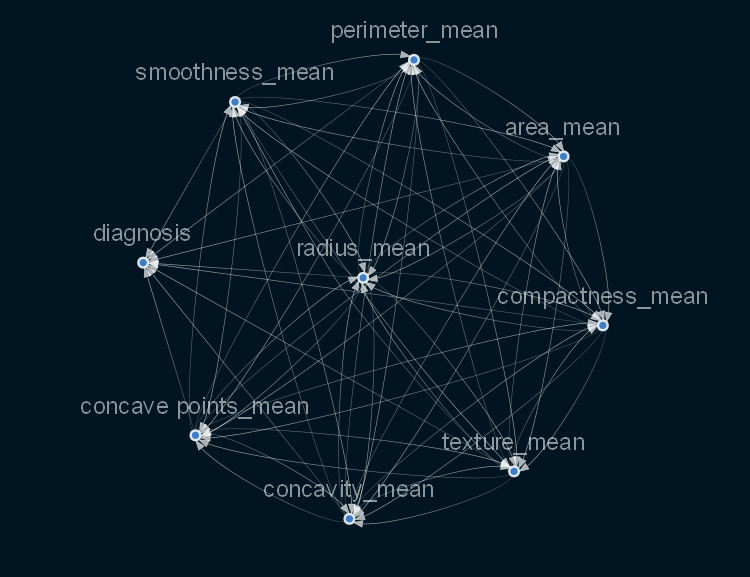

In [41]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

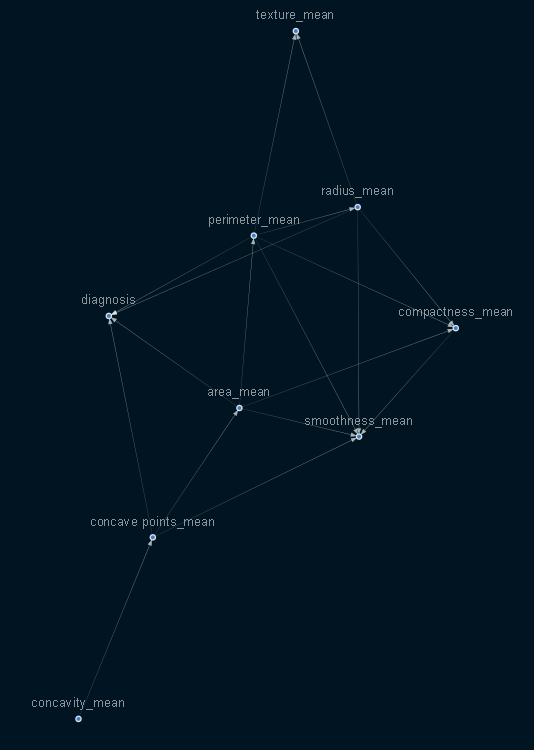

In [42]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Stablity of causal graph

In [43]:
select_x = normal_data.iloc[:,:10]

#### 50%

In [44]:
fiftyPart = int(select_x.shape[0]*0.5)
x_fiftyPart = select_x.head(fiftyPart)

CPU times: total: 40.6 s
Wall time: 22.8 s


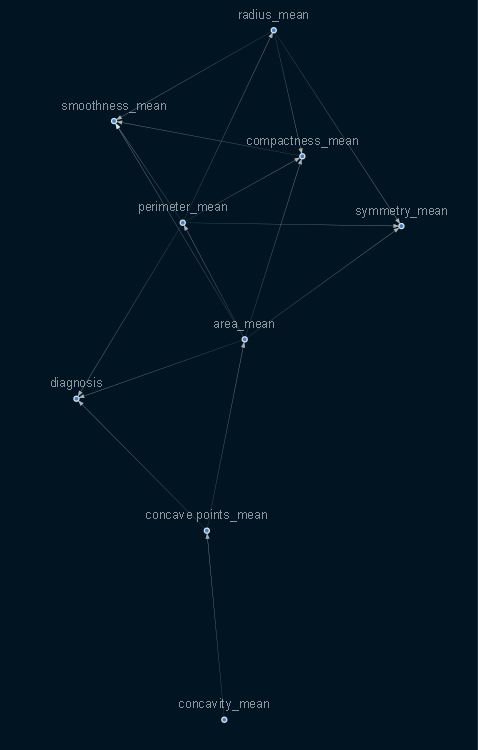

In [50]:

%%time
sm1 = from_pandas(x_fiftyPart, tabu_parent_nodes=['diagnosis'],)
sm1.remove_edges_below_threshold(0.8)
sm1 = sm1.get_largest_subgraph()
viz = plot_structure(
    sm1,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## 60%

In [56]:
sixtyPart = int(select_x.shape[0]*0.6)
x_sixtyPart = select_x.head(sixtyPart)

CPU times: total: 26.5 s
Wall time: 15.8 s


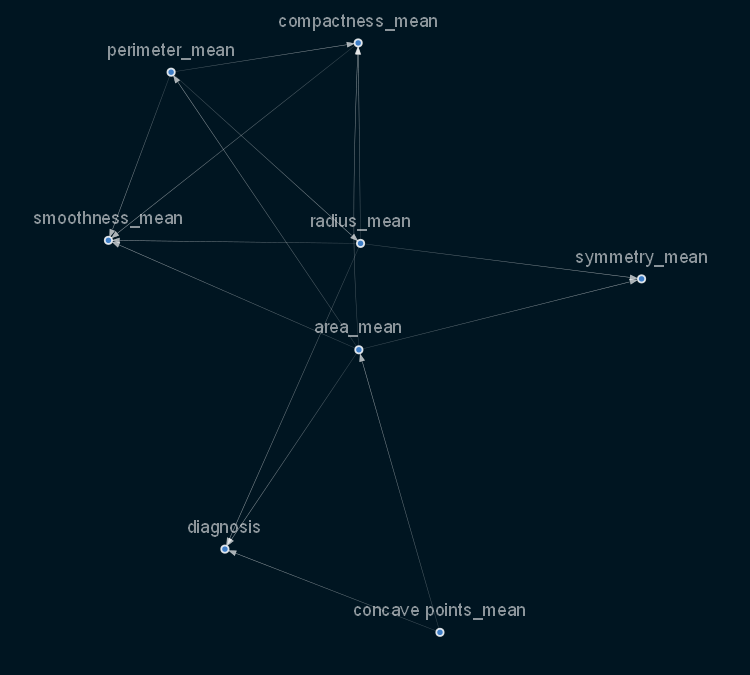

In [57]:
%%time
sm2 = from_pandas(x_sixtyPart, tabu_parent_nodes=['diagnosis'],)
sm2.remove_edges_below_threshold(0.8)
sm2 = sm2.get_largest_subgraph()

viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Jaccard similarity

In [59]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)), 3)

In [60]:
jaccard_similarity(sm1.edges, sm2.edges)

0.778

## 70%

In [61]:
seventyPart = int(select_x.shape[0]*0.7)
x_seventyPart = select_x.head(seventyPart)

CPU times: total: 32 s
Wall time: 19.3 s


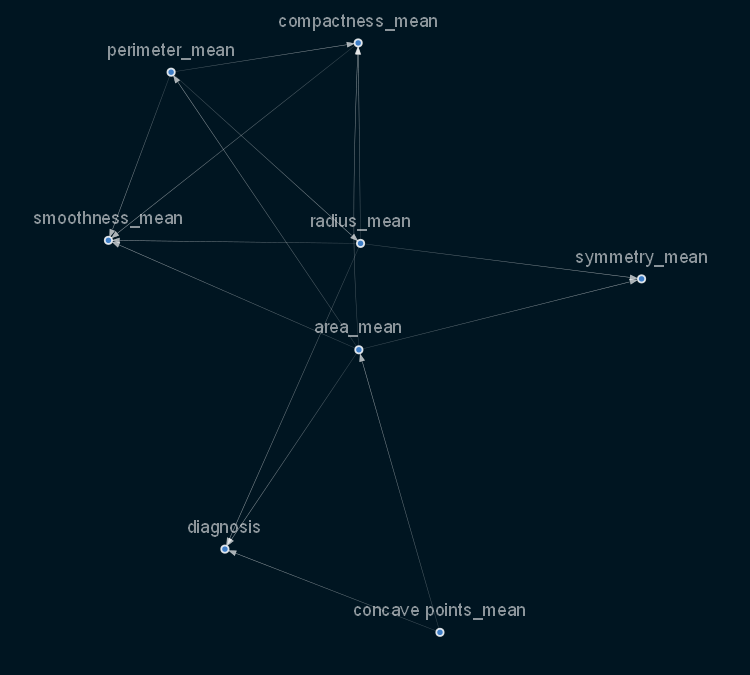

In [62]:
%%time
sm3 = from_pandas(x_seventyPart, tabu_parent_nodes=['diagnosis'],)
sm3.remove_edges_below_threshold(0.8)
sm3 = sm3.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [63]:
jaccard_similarity(sm2.edges, sm3.edges)

0.938

## 80%

In [64]:
eighty_portion = int(select_x.shape[0] * .8)
x_eighty_portion = select_x.head(eighty_portion)

CPU times: total: 23.2 s
Wall time: 13.3 s


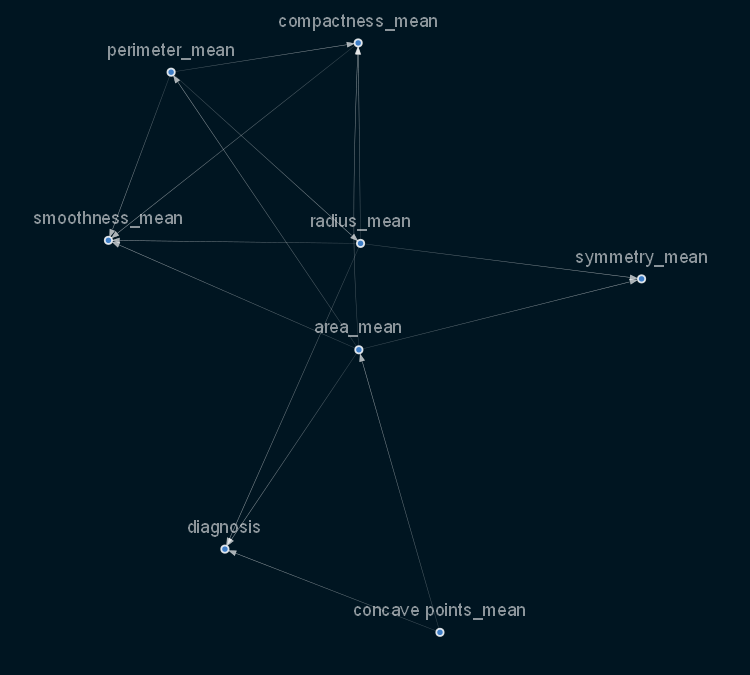

In [65]:
%%time
sm4 = from_pandas(x_eighty_portion, tabu_parent_nodes=['diagnosis'],)
sm4.remove_edges_below_threshold(0.8)
sm4 = sm4.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [66]:
jaccard_similarity(sm3.edges, sm4.edges)

0.882

## 90%

In [67]:

ninety_portion = int(select_x.shape[0] * .9)
x_ninety_portion = select_x.head(ninety_portion)

CPU times: total: 25.2 s
Wall time: 15.6 s


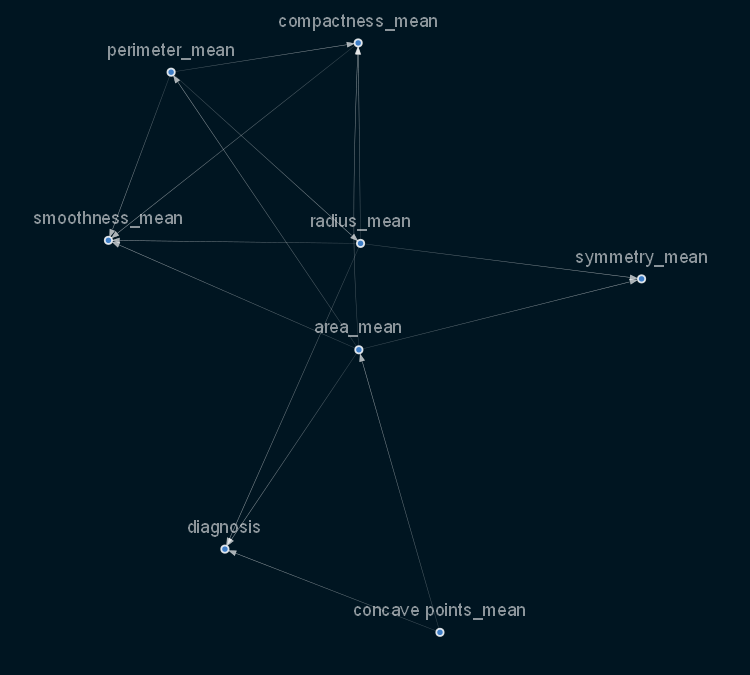

In [68]:
%%time
sm5 = from_pandas(x_ninety_portion, tabu_parent_nodes=['diagnosis'],)
sm5.remove_edges_below_threshold(0.8)
sm5 = sm5.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [69]:
jaccard_similarity(sm5.edges, sm4.edges)

0.737

## 100%

CPU times: total: 27.6 s
Wall time: 16.1 s


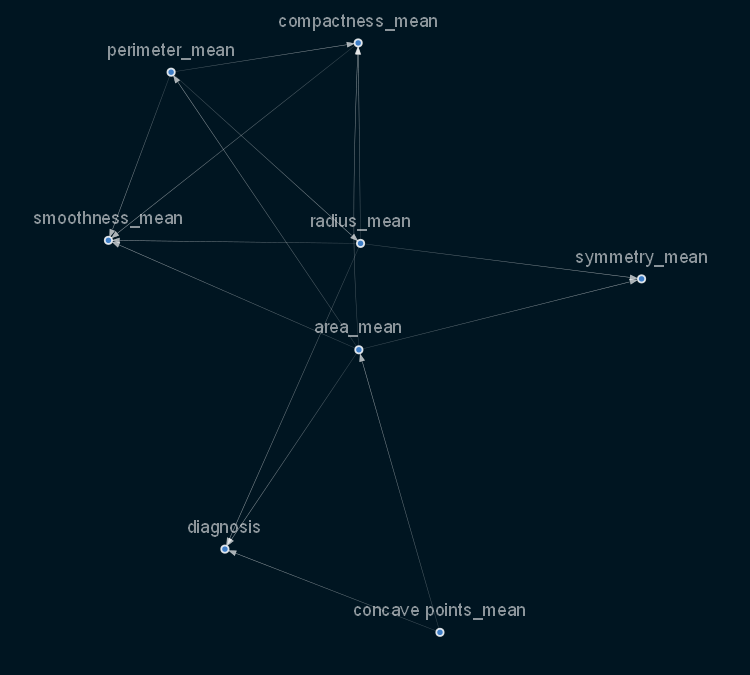

In [71]:
%%time
sm = from_pandas(select_x, tabu_parent_nodes=['diagnosis'],)
sm.remove_edges_below_threshold(0.8)
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [72]:
jaccard_similarity(sm.edges, sm5.edges)

0.636

### Let's use the Markov Blanket to reduce the graph

In [81]:
from causalnex.network import BayesianNetwork
from causalnex.utils.network_utils import get_markov_blanket
bn = BayesianNetwork(sm)
blanket = get_markov_blanket(bn, 'diagnosis')
edge_list = list(blanket.structure.edges)
edge_list

In [80]:
features = list(select_x.columns.difference(['diagnosis']))
features

['area_mean',
 'compactness_mean',
 'concave points_mean',
 'concavity_mean',
 'perimeter_mean',
 'radius_mean',
 'smoothness_mean',
 'symmetry_mean',
 'texture_mean']